In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
X=data.drop(['Sales'],axis=1)
y=data['Sales']
print(X.head())

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)


MSE: 2.9077569102710896
R² Score: 0.9059011844150826


In [15]:
new_test=pd.DataFrame({
    'TV':[150],
    'Radio':[20],
    "Newspaper":[30]
})

predicted_sales = model.predict(new_test)

print("Predicted Sales:", predicted_sales[0])   


Predicted Sales: 15.039523680317231


IndexError: index 13 is out of bounds for axis 0 with size 1

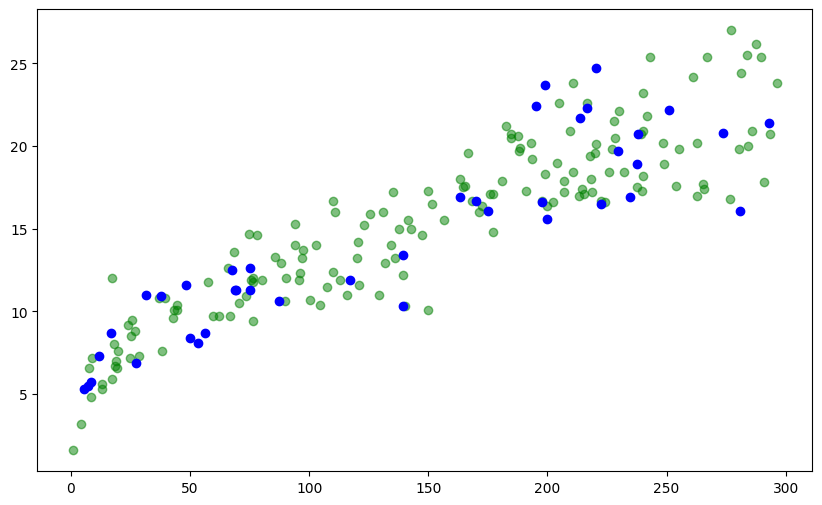

In [22]:
plt.figure(figsize=(10,6))

plt.scatter(X_train['TV'], y_train, color='green', alpha=0.5, label='Training Data')
plt.scatter(X_test['TV'], y_test, color='blue', label='Testing Data')
sorted_idx = X_test['TV'].argsort()
plt.plot(X_test['TV'].iloc[sorted_idx], y_pred[sorted_idx], color='red', label='Predicted')

plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [4]:
data=pd.read_csv('insurance.csv')
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
X=data.drop(['charges'],axis=1)
y=data['charges']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [27]:
#discrete=>age,children
#continuous=>bmi,charges
#nominal=>sex,region
#ordinal=>smoker

#sex,region and smoker are not used in regression because they are categorical values

In [6]:
pd.get_dummies(data['region'], drop_first=True)


,northwest,southeast,southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False
...,...,...,...
1333,True,False,False
1334,False,False,False
1335,False,True,False
1336,False,False,True


In [7]:
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
data['sex'] = data['sex'].map({'female': 0, 'male': 1})


In [32]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [8]:
X = data.drop('charges', axis=1)
y = data['charges']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X.head()

ValueError: could not convert string to float: 'southwest'

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)


In [9]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

ValueError: could not convert string to float: 'female'

In [47]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

33596915.85136147


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
data=pd.read_csv("insurance.csv")
# Separate features and target
X = data.drop('charges', axis=1)
y = data['charges']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame (important for readability)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Check scaled data
print(X_scaled.head())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


ValueError: could not convert string to float: 'female'